In [8]:
import pandas as pd
# 超参数
COLS_ALL = ['期号', '开奖日期', '开奖号码', '开奖号码1']

# 读取excel文件并获取指定列
df = pd.read_csv('Data\福彩3D历史开奖.csv', usecols=COLS_ALL, encoding='GBK')

print(df.head(10))

        期号           开奖日期  开奖号码1  开奖号码
0  2024144  2024-06-02(日)      8   816
1  2024143  2024-06-01(六)      9   955
2  2024142  2024-05-31(五)      8   813
3  2024141  2024-05-30(四)      2   256
4  2024140  2024-05-29(三)      5   536
5  2024139  2024-05-28(二)      7   748
6  2024138  2024-05-27(一)      9   955
7  2024137  2024-05-26(日)      9   982
8  2024136  2024-05-25(六)      2   227
9  2024135  2024-05-24(五)      0    35


In [30]:
import numpy as np
from scipy.optimize import curve_fit

## 定义一个函数：大山算法
def fun_DaShan(x, a, b, c ):
    result = a * x + b + c * x *x 
    # 确保结果至少有两位，如果小于10，补0
    second_digit = np.where(result >= 10, (result // 10) % 10, 0)
    return second_digit

## 取需要训练的值
xdata =df['开奖号码'].iloc[1:131].to_numpy()
ydata =df['开奖号码1'].iloc[0:130].to_numpy()
print(xdata)
print(ydata)

## 使用曲线拟合，来拟合给定的函数
popt, pcov = curve_fit(fun_DaShan, xdata, ydata)
## 得出a值和b值
print("幂律系数 a = {}, b = {}, c = {}".format(popt[0], popt[1], popt[2]))

[955 813 256 536 748 955 982 227  35 640 741 652  69  66  67 573 214 323
 649 787 183 708 289 549 508 343 989 851  99  75 242 630 206 506 181 432
  62 127 976 579 984 339 594 936 190 620 389 129 257 679 647  71 564 890
 457 761 797 532 490 219 899 920 108 775 931 397 336 655 254  41 258 977
 213 671 451 642 709 198 469   9 349 377 406 897 758 469 805 542 589 192
 478 310 340 634 811 128 420 730 406 363 257  86 315 736 228 676 460 265
  45 856 945 995  60 935  94 662 849 149 749 473 247 285 446 868 953 430
 659 920 438 251]
[8 9 8 2 5 7 9 9 2 0 6 7 6 0 0 0 5 2 3 6 7 1 7 2 5 5 3 9 8 0 0 2 6 2 5 1 4
 0 1 9 5 9 3 5 9 1 6 3 1 2 6 6 0 5 8 4 7 7 5 4 2 8 9 1 7 9 3 3 6 2 0 2 9 2
 6 4 6 7 1 4 0 3 3 4 8 7 4 8 5 5 1 4 3 3 6 8 1 4 7 4 3 2 0 3 7 2 6 4 2 0 8
 9 9 0 9 0 6 8 1 7 4 2 2 4 8 9 4 6 9 4]
幂律系数 a = 1.0, b = 1.0, c = 1.0


C:\Users\admin\AppData\Local\Temp\ipykernel_36168\1615729060.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fun_DaShan, xdata, ydata)


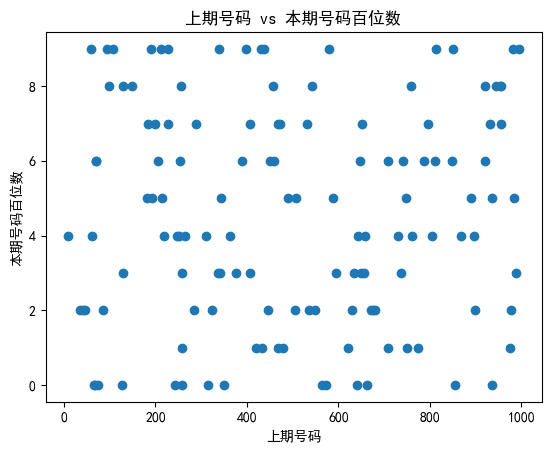

In [31]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(xdata, ydata)
VAULE_X = '上期号码'
VAULE_Y = '本期号码百位数'

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()